<font color=black size=5 face=雅黑>**KNN的过程**</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train= np.random.randn(10,2)
X_train

array([[-0.48808841, -0.49239619],
       [-1.40967126,  2.26174071],
       [-0.69704462, -1.73257084],
       [-1.23607054, -0.79772447],
       [-0.09699378, -0.41798579],
       [ 0.73290965, -0.64154403],
       [-1.14691721, -2.25450853],
       [ 0.01919792,  0.94903379],
       [ 0.08433867,  0.69854748],
       [-0.76312421, -0.55737315]])

In [3]:
y_train=np.array([0,0,0,0,0,1,1,1,1,1])

In [4]:
X_train[:,0]

array([-0.48808841, -1.40967126, -0.69704462, -1.23607054, -0.09699378,
        0.73290965, -1.14691721,  0.01919792,  0.08433867, -0.76312421])

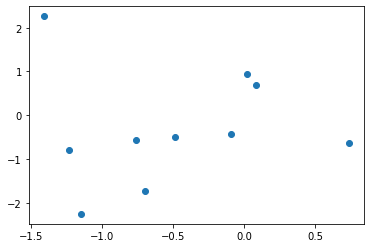

In [5]:
plt.scatter(X_train[:,0],X_train[:,1])

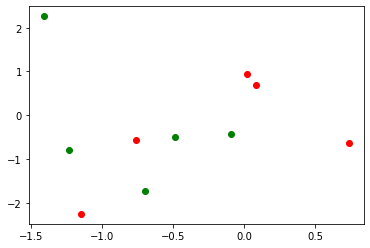

In [6]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.show()

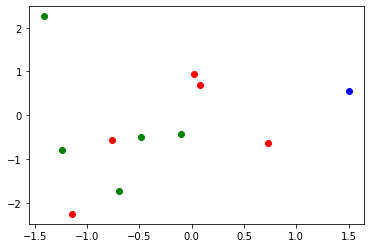

In [60]:
x=np.array([1.5,0.55])
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.scatter(x[0],x[1],color='b')
plt.show()

In [22]:
#方法一
from math import sqrt
distances=[]
for x_train in X_train:
    d=sqrt(np.sum((x_train-x)**2))
    distances.append(d)

In [25]:
#方法二
distances=[sqrt(np.sum((x_train-x)**2))for x_train in X_train]
distances

[2.244790708582591,
 3.375832205721562,
 3.1681437269433768,
 3.049990696270254,
 1.8674543223168583,
 1.4171114222454082,
 3.8563504554514125,
 1.533624063530127,
 1.423433649551032,
 2.5195250526340143]

In [36]:
#argsort,对一个数组进行排序，返回的事相应的索引
nearest=np.argsort(distances)
nearest

array([5, 8, 7, 4, 0, 9, 3, 2, 1, 6])

In [27]:
k=6

In [46]:
topk_y=[y_train[i]for i in nearest[:k]]
topk_y

[1, 1, 1, 0, 0, 1]

In [47]:
from collections import Counter
votes=Counter(topk_y)
votes

Counter({1: 4, 0: 2})

In [48]:
votes.most_common(1)

[(1, 4)]

In [52]:
predict_y=votes.most_common(1)[0][0]
predict_y

1

<font color=black size=5 face=雅黑>**使用scikit-learn中的KNN**</font>

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
KNN_classifier=KNeighborsClassifier(n_neighbors=6)

In [66]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [77]:
#将x原本是（2，0）转换成（1，2）矩阵
x_predict=x.reshape(1,-1)
x_predict

array([[1.5 , 0.55]])

In [79]:
y_predict=KNN_classifier.predict(x_predict)

In [81]:
y_predict[0]

1

<font color=black size=5 face=雅黑>**测试KNN**</font>

In [228]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [229]:
iris=datasets.load_iris()

In [230]:
X=iris.data
y=iris.target

<font color=black size=5 face=雅黑>**将数据乱序处理**</font>

In [135]:
#np.random.permutation对X索引进行随机排序
shuffle_indexes=np.random.permutation(len(X))
shuffle_indexes

array([144, 128,  57,  87,  94,  64,  35,  12,   8,  99, 126,  45,  85,
       114,  48, 132,  50,   5, 145,   9,  92, 105,  32,  82,  79, 108,
        59,  24,  69, 148,  29,  83,  63,  53,  11, 118,  22, 100,  19,
         0,  58,  54,  37,   4, 127, 142,  78,  70,  34, 131, 135,  13,
       113,  65,  21, 137, 107,  86, 124, 117, 121,  41,  28,  88,  77,
       139,  38,  68,   2,  55,  39, 141,  30, 116,  42, 136,  74, 138,
         3,  51, 123,  91,  43,  81, 102, 133,  96, 125,   6,  31,  33,
        95,  56,  23, 110,  46,  40, 122,  98,  60,  73, 112,  62, 101,
       140, 120, 109,  52,  36,  89, 146,  16,  90,  49,  27, 134,  72,
        93, 130, 103,  67,  80,  14, 115,  75, 147,  17, 111,  20,  10,
        18, 149,  76,  61,   1,  25,  26, 104,  44,  47,  66, 143,  71,
         7,  97,  15, 119,  84, 129, 106])

In [136]:
test_ratio=0.2
test_size=int(len(X)* test_ratio)

In [150]:
test_indexes=shuffle_indexes[:test_size]
train_indexes=shuffle_indexes[test_size:]

In [151]:
X_train=X[train_indexes]
y_train=y[train_indexes]

In [154]:
X_test=X[test_indexes]
y_test=y[test_indexes]
X_test.shape

(30, 4)

In [163]:
rf=KNeighborsClassifier(n_neighbors=3)

In [164]:
rf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [166]:
y_predict=rf.predict(X_test)

In [167]:
y_test

array([1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 2, 2, 0, 2, 2])

In [168]:
sum(y_predict==y_test)

28

In [169]:
#算法准确率accuracy
sum(y_predict==y_test)/len(X_test)

0.9333333333333333

In [179]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<font color=black size=5 face=雅黑>**sklearn中的train_test_split**</font>

In [220]:
#方法二
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train1, X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2,random_state=0)

In [221]:
rf1=KNeighborsClassifier(n_neighbors=3)

In [222]:
rf1.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=3)

In [224]:
y_predict=rf.predict(X_test1)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [225]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [227]:
#算法准确率
accuracy=sum(y_predict==y_test)/len(X_test)
accuracy

1.0